In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/Workhours_by_industry.csv
/kaggle/input/GDP by industry.csv
/kaggle/input/CPI_monthly.csv


**Objective:** This notebook is a an attempt to analyze the impact of the Covid-19 on Canada and it's economy over the months by using the datasets produced by the Statistics Canada. Statistics Canada (French: Statistique Canada), formed in 1971, is the Canadian government agency commissioned with producing statistics to help better understand Canada, its population, resources, economy, society, and culture. 

We will be basically using three main indicators the GDP, CPI and the working hours and how they have been impacted by the covid-19 to analyze it's impact on the canadian economy. So before starting let's first try to understand what these indicators indicate:

GDP by industry: Gross Domestic Product (GDP) by industry is one of the three GDP series produced by the Canadian System of National Accounts (CSNA) of Statistics Canada. It is also known as the Output based GDP, because it sums the value added (output less intermediate consumption of goods and services) of all industries in Canada. A seasonally adjusted series is one from which seasonal movements have been eliminated. More information about this can be obtained from -https://unstats.un.org/unsd/nationalaccount/workshops/2009/ottawa/AC188-Bk4.PDF

CPI: The Consumer Price Index (CPI) is not a cost-of-living index. We could compute a cost-of-living index for an individual if we had complete information about that person's taste and spending habits. To do this for a large number of people, let alone the total population of Canada, is impossible. For this reason, regularly published price indexes are based on the fixed-basket concept rather than the cost-of-living concept. More information about this can be obtained from - https://www.statcan.gc.ca/eng/subjects-start/prices_and_price_indexes/consumer_price_indexes

Workhours by industry: Actual hours worked is the sum of hours actually worked by all employed persons in the reference week. A seasonally adjusted series is one from which seasonal movements have been eliminated. It should be noted that the seasonally adjusted series contain irregular as well as longer-term cyclical fluctuations. The seasonal adjustment program is a complicated computer program which differentiates between these seasonal, cyclical and irregular movements in a series over a number of years and, on the basis of past movements, estimates appropriate seasonal factors for current data. On an annual basis, the historic series of seasonally adjusted data are revised in light of the most recent information on changes in seasonality. More information about this can be obtained from - https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1410028901


# Reading the datasets

*Reading the 'GDP by industry.csv' dataset:*

In [24]:
#reading and viewing the GDP by NAICS classified industries data set
gdp=pd.read_csv("../input/GDP by industry.csv")
gdp.head()

,North American Industry Classification System (NAICS),Nov-19,Dec-19,Jan-20,Feb-20,Mar-20
0,All industries [T001]4,"19,81,970","19,87,713","19,88,839","19,90,433","18,46,869"
1,Goods-producing industries [T002]4,"5,71,952","5,72,822","5,74,167","5,75,858","5,49,519"
2,Service-producing industries [T003]4,"14,06,484","14,11,249","14,11,159","14,11,203","12,96,191"
3,Business sector industries [T004],"16,31,026","16,36,516","16,37,443","16,39,850","15,22,290"
4,Non-business sector industries [T007],"3,51,077","3,51,371","3,51,555","3,50,824","3,24,870"


Gross domestic product (GDP) at basic prices, by industry, monthly (x 1,000,000).
Seasonally adjusted at annual rates.

As can be seen from the first five rows of the data set, we have a list of industries and their GDP for the months of Nov-2019, Dec-2019, Jan-2020, Feb-2020, Mar-2020.

In [25]:
#This displays general information about the dataset with informations like the column names their data types 
#and the count of non-null values for every column.
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   North American Industry Classification System (NAICS)  36 non-null     object
 1   Nov-19                                                 36 non-null     object
 2   Dec-19                                                 36 non-null     object
 3   Jan-20                                                 36 non-null     object
 4   Feb-20                                                 36 non-null     object
 5   Mar-20                                                 36 non-null     object
dtypes: object(6)
memory usage: 1.8+ KB


In [26]:
#displays the columns present in the dataset
gdp.columns

Index(['North American Industry Classification System (NAICS)', 'Nov-19',
       'Dec-19', 'Jan-20', 'Feb-20', 'Mar-20'],
      dtype='object')

*Reading the 'CPI_monthly.csv' dataset:*

In [28]:
#reading and viewing the CPI by product and product groups data set
cpi=pd.read_csv('../input/CPI_monthly.csv')
cpi.head()

,Products and product groups3 4,Dec-19,Jan-20,Feb-20,Mar-20,Apr-20
0,All-items,136.4,136.8,137.4,136.6,135.7
1,Food 5,151.9,153.5,152.9,152.8,154.0
2,Shelter 6,146.3,146.4,146.7,146.5,146.0
3,"Household operations, furnishings and equipment",122.9,122.6,123.3,123.7,124.2
4,Clothing and footwear,95.3,95.8,97.4,99.0,93.2


Consumer Price Index, monthly, not seasonally adjusted.

As can be seen from the first five rows of the dataset, we have a list of products and product groups and their monthly CPI for the months of  Dec-2019, Jan-2020, Feb-2020, Mar-2020, Apr-2020.

In [29]:
#This displays general information about the dataset with informations like the column names their data types 
#and the count of non-null values for every column.
cpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Products and product groups3 4  15 non-null     object 
 1   Dec-19                          15 non-null     float64
 2   Jan-20                          15 non-null     float64
 3   Feb-20                          15 non-null     float64
 4   Mar-20                          15 non-null     float64
 5   Apr-20                          15 non-null     float64
dtypes: float64(5), object(1)
memory usage: 1.4+ KB


*Reading the 'Workhours_by_industry.csv' dataset:*

In [30]:
#reading and viewing the workhours by NAICS classified industries dataset
workhours=pd.read_csv('../input/Workhours_by_industry.csv')
workhours.head()

,North American Industry Classification System (NAICS)5,Jan-20,Feb-20,Mar-20,Apr-20,May-20
0,"Total actual hours worked, all industries 6","6,24,926.40","6,32,365.70","5,36,710.10","4,56,983.80","4,85,951.20"
1,Goods-producing sector 7,"1,47,523.70","1,50,569.10","1,38,063.20","1,04,590.10","1,16,968.00"
2,Agriculture 8,"12,169.70","12,208.40","11,622.50","10,908.50","10,995.90"
3,"Forestry, fishing, mining, quarrying, oil and ...","13,081.30","12,543.70","12,476.70","10,387.50","11,342.00"
4,Utilities,"5,139.30","5,217.20","4,928.80","4,764.70","4,922.40"


Actual hours worked at main job by industry, monthly, seasonally adjusted, last 5 months (x 1,000) 

As can be seen from the first five rows of the dataset, we have a list of industries and their monthly workhours for the months of Jan-2020, Feb-2020, Mar-2020, Apr-2020, May-2020.

In [31]:
#This displays general information about the dataset with informations like the column names their data types 
#and the count of non-null values for every column.
workhours.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 6 columns):
 #   Column                                                  Non-Null Count  Dtype 
---  ------                                                  --------------  ----- 
 0   North American Industry Classification System (NAICS)5  19 non-null     object
 1   Jan-20                                                  19 non-null     object
 2   Feb-20                                                  19 non-null     object
 3   Mar-20                                                  19 non-null     object
 4   Apr-20                                                  19 non-null     object
 5   May-20                                                  19 non-null     object
dtypes: object(6)
memory usage: 1.0+ KB


# Data Wrangling and Data Preparation

As can be seen from the above section that the columns contain the months and the rows have the industries (for the GDP and workhours dataset) or products (for the CPI dataset). But for easier analysis of the data we would like to have the industries/products across the columns of the dataframe and the months across the rows, thus in order to obtain that we will take transpose of the dataframes.

In [32]:
#taking transpose of the gdp dataframe for easier analysis
gdp_t=gdp.transpose()
gdp_t.columns=gdp_t.iloc[0]
gdp_t.drop('North American Industry Classification System (NAICS)',inplace=True,axis=0)
gdp_t.head()

North American Industry Classification System (NAICS),All industries [T001]4,Goods-producing industries [T002]4,Service-producing industries [T003]4,Business sector industries [T004],Non-business sector industries [T007],Industrial production [T010]4,Non-durable manufacturing industries [T011]4,Durable manufacturing industries [T012]4,Information and communication technology sector [T013]4,Energy sector [T016]4,...,Real estate and rental and leasing [53],"Professional, scientific and technical services [54]",Management of companies and enterprises [55],"Administrative and support, waste management and remediation services [56]",Educational services [61],Health care and social assistance [62],"Arts, entertainment and recreation [71]",Accommodation and food services [72],Other services (except public administration) [81],Public administration [91]
Nov-19,"19,81,970","5,71,952","14,06,484","16,31,026","3,51,077","3,95,811","91,319","1,07,650","96,205","1,77,291",...,"2,53,957","1,20,424","9,341","52,501","1,05,115","1,41,459","15,546","45,016","37,906","1,33,964"
Dec-19,"19,87,713","5,72,822","14,11,249","16,36,516","3,51,371","3,96,820","91,971","1,07,022","96,268","1,79,041",...,"2,54,453","1,20,454","9,330","52,484","1,04,742","1,41,916","15,648","44,934","37,816","1,34,235"
Jan-20,"19,88,839","5,74,167","14,11,159","16,37,443","3,51,555","3,97,304","92,684","1,06,548","96,493","1,78,045",...,"2,54,751","1,20,895","9,382","52,648","1,04,108","1,42,264","15,504","44,595","37,913","1,34,701"
Feb-20,"19,90,433","5,75,858","14,11,203","16,39,850","3,50,824","3,97,747","92,242","1,06,584","96,390","1,79,094",...,"2,56,103","1,21,195","9,445","52,525","1,02,795","1,42,637","15,551","44,429","37,766","1,35,089"
Mar-20,"18,46,869","5,49,519","12,96,191","15,22,290","3,24,870","3,76,978","91,243","94,789","94,933","1,73,449",...,"2,53,443","1,10,803","8,999","45,224","88,873","1,26,866","9,128","28,054","32,118","1,28,957"


In [33]:
#taking transpose of the cpi dataframe for easier analysis
cpi_t=cpi.transpose()
cpi_t.columns=cpi_t.iloc[0]
cpi_t.drop(['Products and product groups3 4'],axis=0,inplace=True)
cpi_t.dropna(inplace=True,axis=1)
cpi_t.head()

Products and product groups3 4,All-items,Food 5,Shelter 6,"Household operations, furnishings and equipment",Clothing and footwear,Transportation,Gasoline,Health and personal care,"Recreation, education and reading","Alcoholic beverages, tobacco products and recreational cannabis",All-items excluding food and energy 7,All-items excluding energy 7,Energy 7,Goods 8,Services 9
Dec-19,136.4,151.9,146.3,122.9,95.3,143.1,165.8,127.9,113.2,170,130.8,134.5,158.3,122.6,150.1
Jan-20,136.8,153.5,146.4,122.6,95.8,143.4,166.4,128.6,113,171.4,131,134.9,158.6,123.7,149.7
Feb-20,137.4,152.9,146.7,123.3,97.4,144,163.1,128.8,116,171.4,132.1,135.7,156.6,123.9,150.8
Mar-20,136.6,152.8,146.5,123.7,99,138.9,134,128.6,116,171.5,132.2,135.8,140.6,122,151.1
Apr-20,135.7,154,146,124.2,93.2,136.7,113.6,128.7,115,172.1,131.8,135.7,128.3,120.2,151.1


In [34]:
#taking transpose of the workhours dataframe for easier analysis
workhours_t=workhours.transpose()
workhours_t.columns=workhours_t.iloc[0]
workhours_t.drop('North American Industry Classification System (NAICS)5',inplace=True,axis=0)
workhours_t.head()

North American Industry Classification System (NAICS)5,"Total actual hours worked, all industries 6",Goods-producing sector 7,Agriculture 8,"Forestry, fishing, mining, quarrying, oil and gas 9 10",Utilities,Construction,Manufacturing,Services-producing sector 11,Wholesale and retail trade,Transportation and warehousing,"Finance, insurance, real estate, rental and leasing","Professional, scientific and technical services","Business, building and other support services 12",Educational services,Health care and social assistance,"Information, culture and recreation",Accommodation and food services,Other services (except public administration),Public administration
Jan-20,"6,24,926.40","1,47,523.70","12,169.70","13,081.30","5,139.30","53,612.80","63,520.60","4,77,402.80","88,296.70","37,584.40","41,957.30","54,789.70","24,018.60","39,620.20","75,465.90","23,030.10","33,205.90","25,864.80","33,569.20"
Feb-20,"6,32,365.70","1,50,569.10","12,208.40","12,543.70","5,217.20","55,112.80","65,487.00","4,81,796.50","90,184.10","37,784.40","42,511.40","53,964.10","24,081.50","39,392.20","76,261.90","23,991.20","33,505.20","26,430.60","33,689.90"
Mar-20,"5,36,710.10","1,38,063.20","11,622.50","12,476.70","4,928.80","48,179.30","60,855.90","3,98,646.90","77,315.60","33,109.80","39,668.60","49,648.40","20,834.10","28,027.70","62,618.60","16,639.70","19,739.20","20,541.70","30,503.70"
Apr-20,"4,56,983.80","1,04,590.10","10,908.50","10,387.50","4,764.70","32,185.40","46,343.90","3,52,393.80","62,226.50","27,337.90","36,854.50","47,230.90","16,783.70","30,110.90","59,254.40","15,001.60","12,120.80","13,672.20","31,800.50"
May-20,"4,85,951.20","1,16,968.00","10,995.90","11,342.00","4,922.40","38,314.70","51,393.00","3,68,983.20","69,101.30","27,222.40","38,328.40","47,651.80","16,624.10","32,935.70","61,796.00","15,087.10","12,408.80","15,473.90","32,353.60"


Next, we will check for the presence of any null values in any column of the dataframes.

In [35]:
#checking for null values
gdp_t.isnull().sum()

North American Industry Classification System (NAICS)
All industries  [T001]4                                                        0
Goods-producing industries  [T002]4                                            0
Service-producing industries  [T003]4                                          0
Business sector industries  [T004]                                             0
Non-business sector industries  [T007]                                         0
Industrial production  [T010]4                                                 0
Non-durable manufacturing industries  [T011]4                                  0
Durable manufacturing industries  [T012]4                                      0
Information and communication technology sector  [T013]4                       0
Energy sector  [T016]4                                                         0
Industrial production (1950 definition)  [T017]4                               0
Public Sector  [T018]4                                 

In [36]:
#checking for null values
cpi_t.isna().sum()

Products and product groups3 4
All-items                                                          0
Food 5                                                             0
Shelter 6                                                          0
Household operations, furnishings and equipment                    0
Clothing and footwear                                              0
Transportation                                                     0
Gasoline                                                           0
Health and personal care                                           0
Recreation, education and reading                                  0
Alcoholic beverages, tobacco products and recreational cannabis    0
All-items excluding food and energy 7                              0
All-items excluding energy 7                                       0
Energy 7                                                           0
Goods 8                                                            0
Ser

In [37]:
#checking for null values
workhours_t.isnull().sum()

North American Industry Classification System (NAICS)5
Total actual hours worked, all industries 6               0
Goods-producing sector 7                                  0
Agriculture 8                                             0
Forestry, fishing, mining, quarrying, oil and gas 9 10    0
Utilities                                                 0
Construction                                              0
Manufacturing                                             0
Services-producing sector 11                              0
Wholesale and retail trade                                0
Transportation and warehousing                            0
Finance, insurance, real estate, rental and leasing       0
Professional, scientific and technical services           0
Business, building and other support services 12          0
Educational services                                      0
Health care and social assistance                         0
Information, culture and recreation          

Thus there are no null values.

As we noticed that for the GDP and Workhours dataframes, the numerical columns are of object type but we would like to have them in float/int datatype for better analysis of the data, thus we will convert the datatype of these columns to 'float' from 'object'.

*Converting the datatype of the numerical columns of the GDP dataset*

In [38]:
#changing the datatypes from object to float 
for x in gdp_t.iloc[:,:]:
    gdp_t[x]=gdp_t[x].apply(lambda y: float(y.replace(',','')))
    
gdp_t.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, Nov-19 to Mar-20
Data columns (total 36 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   All industries  [T001]4                                                      5 non-null      float64
 1   Goods-producing industries  [T002]4                                          5 non-null      float64
 2   Service-producing industries  [T003]4                                        5 non-null      float64
 3   Business sector industries  [T004]                                           5 non-null      float64
 4   Non-business sector industries  [T007]                                       5 non-null      float64
 5   Industrial production  [T010]4                                               5 non-null      float64
 6   Non-durable manufacturing industries  [T0

*Converting the datatype of the Workhours by industry dataset*

In [39]:
#changing the datatypes from object to float 
for x in workhours_t.iloc[:,:]:
    workhours_t[x]=workhours_t[x].apply(lambda y: float(y.replace(',','')))
    
workhours_t.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, Jan-20 to May-20
Data columns (total 19 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Total actual hours worked, all industries 6             5 non-null      float64
 1   Goods-producing sector 7                                5 non-null      float64
 2   Agriculture 8                                           5 non-null      float64
 3   Forestry, fishing, mining, quarrying, oil and gas 9 10  5 non-null      float64
 4   Utilities                                               5 non-null      float64
 5   Construction                                            5 non-null      float64
 6   Manufacturing                                           5 non-null      float64
 7   Services-producing sector 11                            5 non-null      float64
 8   Wholesale and retail trade             

Now we have all the numerical columns in float type.

# Feature Engineering

For better analysis we would like to have a feature which will indicate whether there has been a decrease or increase in the GDP by industry or CPI by product/product group or Working hours by industry. Thus we will create a new feature 'Increased/Decreased Percentage' which will indicate the percentage increase/ decrease in the GDP/Working hours industry wise and CPI product wise.

*Feature Engineering for the GDP dataset:*

In [40]:
#deriving a new feature which will represent the percentage of increase/decrease in GDP 
x=[]
for i in gdp_t.iloc[:,0:]:
    x.append(((gdp_t.loc['Mar-20',i]-gdp_t.loc['Nov-19',i])/gdp_t.loc['Nov-19',i])*100)
    
print(x)

[-6.816500754300014, -3.9221822810305755, -7.841752910093539, -6.6667238903610375, -7.464744201414504, -4.758078982140466, -0.083224739648923, -11.947050627032048, -1.3221766020477106, -2.1670586775414433, -4.746877730379812, -9.40566221180477, -15.950209871182516, -6.807587021384287, -8.80374044931007, -6.821619494907251, -1.2629549288985298, -2.0452494968422514, -1.1317777026265359, -2.7808848461825266, -6.584866870077058, -3.6297818217395554, -8.830311083320307, -12.8820763248327, -2.787757304756765, -0.8106452287737964, -0.202396468693519, -7.989271241612967, -3.661278235734932, -13.860688367840613, -15.451648194834231, -10.316063311630932, -41.28393155795703, -37.67993602274747, -15.269350498601804, -3.737571287808665]


The negative values indicate that there has been a net decrease in the GDP from the month of Nov-2019 to Mar-2020, for all the industries listed in the dataset and this decrease in GDP varies across the industries.

In [41]:
#appending the newly created feature to the gdp_t dataframe
x=pd.Series(x,name='Increased/Decreased Percentage',index=gdp_t.columns)
gdp_t=gdp_t.append(x,ignore_index=False)

gdp_t.tail()

North American Industry Classification System (NAICS),All industries [T001]4,Goods-producing industries [T002]4,Service-producing industries [T003]4,Business sector industries [T004],Non-business sector industries [T007],Industrial production [T010]4,Non-durable manufacturing industries [T011]4,Durable manufacturing industries [T012]4,Information and communication technology sector [T013]4,Energy sector [T016]4,...,Real estate and rental and leasing [53],"Professional, scientific and technical services [54]",Management of companies and enterprises [55],"Administrative and support, waste management and remediation services [56]",Educational services [61],Health care and social assistance [62],"Arts, entertainment and recreation [71]",Accommodation and food services [72],Other services (except public administration) [81],Public administration [91]
Dec-19,1.987713e+06,572822.000000,1.411249e+06,1.636516e+06,351371.000000,396820.000000,91971.000000,107022.000000,96268.000000,179041.000000,...,254453.000000,120454.000000,9330.000000,52484.000000,104742.000000,141916.000000,15648.000000,44934.000000,37816.00000,134235.000000
Jan-20,1.988839e+06,574167.000000,1.411159e+06,1.637443e+06,351555.000000,397304.000000,92684.000000,106548.000000,96493.000000,178045.000000,...,254751.000000,120895.000000,9382.000000,52648.000000,104108.000000,142264.000000,15504.000000,44595.000000,37913.00000,134701.000000
Feb-20,1.990433e+06,575858.000000,1.411203e+06,1.639850e+06,350824.000000,397747.000000,92242.000000,106584.000000,96390.000000,179094.000000,...,256103.000000,121195.000000,9445.000000,52525.000000,102795.000000,142637.000000,15551.000000,44429.000000,37766.00000,135089.000000
Mar-20,1.846869e+06,549519.000000,1.296191e+06,1.522290e+06,324870.000000,376978.000000,91243.000000,94789.000000,94933.000000,173449.000000,...,253443.000000,110803.000000,8999.000000,45224.000000,88873.000000,126866.000000,9128.000000,28054.000000,32118.00000,128957.000000
Increased/Decreased Percentage,-6.816501e+00,-3.922182,-7.841753e+00,-6.666724e+00,-7.464744,-4.758079,-0.083225,-11.947051,-1.322177,-2.167059,...,-0.202396,-7.989271,-3.661278,-13.860688,-15.451648,-10.316063,-41.283932,-37.679936,-15.26935,-3.737571


So now we have a feature 'Increased/Decreased Percentage' in the dataframe which we can use for better analysis of the GDP trend over the time period.

*Feature Engineering for the CPI dataset:*

In [42]:
#deriving a new feature which will represent the percentage of increase/decrease in CPI 
x=[]
for i in cpi_t.iloc[:,0:]:
    x.append(((cpi_t.loc['Apr-20',i]-cpi_t.loc['Dec-19',i])/cpi_t.loc['Dec-19',i])*100)
    
print(x)

[-0.5131964809384288, 1.382488479262669, -0.20505809979494966, 1.0577705451586632, -2.2035676810073395, -4.472396925227118, -31.483715319662252, 0.6254886630179695, 1.5901060070671353, 1.2352941176470555, 0.7645259938837919, 0.8921933085501774, -18.951358180669615, -1.9575856443719346, 0.6662225183211192]


The negative values indicate that there has been a net decrease in the CPI for that particular product/product group from the month of Dec-2019 to Apr-2020 and the positive percentage values indicate a net increase in CPI for those products.

In [43]:
#appending the newly created feature to the dataframe
x=pd.Series(x,name='Increased/Decreased Percentage',index=cpi_t.columns)
cpi_t=cpi_t.append(x,ignore_index=False)

cpi_t.tail()

Products and product groups3 4,All-items,Food 5,Shelter 6,"Household operations, furnishings and equipment",Clothing and footwear,Transportation,Gasoline,Health and personal care,"Recreation, education and reading","Alcoholic beverages, tobacco products and recreational cannabis",All-items excluding food and energy 7,All-items excluding energy 7,Energy 7,Goods 8,Services 9
Jan-20,136.8,153.5,146.4,122.6,95.8,143.4,166.4,128.6,113,171.4,131,134.9,158.6,123.7,149.7
Feb-20,137.4,152.9,146.7,123.3,97.4,144,163.1,128.8,116,171.4,132.1,135.7,156.6,123.9,150.8
Mar-20,136.6,152.8,146.5,123.7,99,138.9,134,128.6,116,171.5,132.2,135.8,140.6,122,151.1
Apr-20,135.7,154,146,124.2,93.2,136.7,113.6,128.7,115,172.1,131.8,135.7,128.3,120.2,151.1
Increased/Decreased Percentage,-0.513196,1.38249,-0.205058,1.05777,-2.20357,-4.4724,-31.4837,0.625489,1.59011,1.23529,0.764526,0.892193,-18.9514,-1.95759,0.666223


*Feature Engineering for the Workhours dataset:*

In [44]:
#deriving a new feature which will represent the percentage of increase/decrease in CPI 
x=[]
for i in workhours_t.iloc[:,0:]:
    x.append(((workhours_t.loc['May-20',i]-workhours_t.loc['Jan-20',i])/workhours_t.loc['Jan-20',i])*100)
    

print(x)  

[-22.238650823520977, -20.71240078712777, -9.645266522593007, -13.296079135865696, -4.220419123226908, -28.53441715411246, -19.092388925797298, -22.710298305749355, -21.739657314486266, -27.569949234256764, -8.64903127703642, -13.027813621903379, -30.786557084925853, -16.871444364238446, -18.114009108749773, -34.48964615872271, -62.63073730873129, -40.173904302372335, -3.621176554698946]


The negative values indicate that there has been a net decrease in the working hours from the month of Jan-2020 to May-2020, for all the industries listed in the dataset and this decrease in working hours varies across the industries.

In [45]:
#appending the newly created feature in the dataframe
x=pd.Series(x,name='Increased/Decreased Percentage',index=workhours_t.columns )
workhours_t=workhours_t.append(x,ignore_index=False)
workhours_t.tail()

North American Industry Classification System (NAICS)5,"Total actual hours worked, all industries 6",Goods-producing sector 7,Agriculture 8,"Forestry, fishing, mining, quarrying, oil and gas 9 10",Utilities,Construction,Manufacturing,Services-producing sector 11,Wholesale and retail trade,Transportation and warehousing,"Finance, insurance, real estate, rental and leasing","Professional, scientific and technical services","Business, building and other support services 12",Educational services,Health care and social assistance,"Information, culture and recreation",Accommodation and food services,Other services (except public administration),Public administration
Feb-20,632365.700000,150569.100000,12208.400000,12543.700000,5217.200000,55112.800000,65487.000000,481796.500000,90184.100000,37784.400000,42511.400000,53964.100000,24081.500000,39392.200000,76261.900000,23991.200000,33505.200000,26430.600000,33689.900000
Mar-20,536710.100000,138063.200000,11622.500000,12476.700000,4928.800000,48179.300000,60855.900000,398646.900000,77315.600000,33109.800000,39668.600000,49648.400000,20834.100000,28027.700000,62618.600000,16639.700000,19739.200000,20541.700000,30503.700000
Apr-20,456983.800000,104590.100000,10908.500000,10387.500000,4764.700000,32185.400000,46343.900000,352393.800000,62226.500000,27337.900000,36854.500000,47230.900000,16783.700000,30110.900000,59254.400000,15001.600000,12120.800000,13672.200000,31800.500000
May-20,485951.200000,116968.000000,10995.900000,11342.000000,4922.400000,38314.700000,51393.000000,368983.200000,69101.300000,27222.400000,38328.400000,47651.800000,16624.100000,32935.700000,61796.000000,15087.100000,12408.800000,15473.900000,32353.600000
Increased/Decreased Percentage,-22.238651,-20.712401,-9.645267,-13.296079,-4.220419,-28.534417,-19.092389,-22.710298,-21.739657,-27.569949,-8.649031,-13.027814,-30.786557,-16.871444,-18.114009,-34.489646,-62.630737,-40.173904,-3.621177


# Analyzing using visualizations

*Visualizing the GDP by industry:*

Lets first visualize the GDP of the industries for the month of Nov-2019 and Mar-2020 to see how the contribution of the industries to the GDP changed over these months.

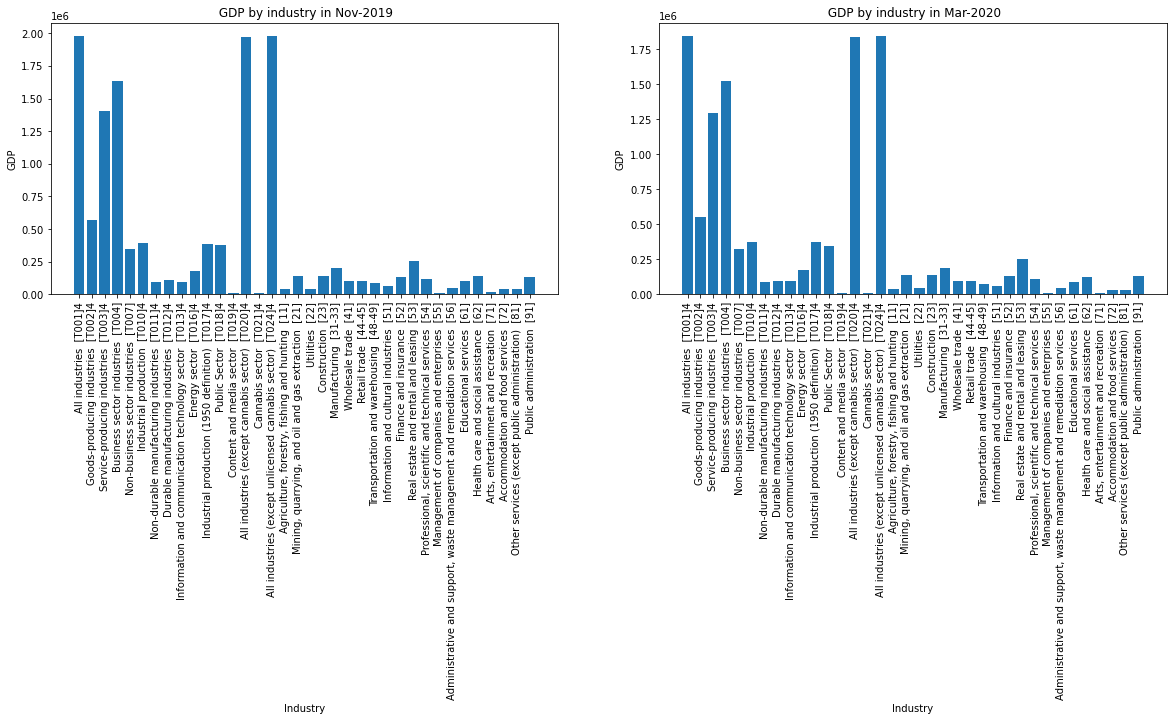

In [46]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.bar(gdp_t.columns,height=gdp_t.loc['Nov-19'])
plt.xticks(rotation=90)
plt.xlabel('Industry')
plt.ylabel('GDP')
plt.title(' GDP by industry in Nov-2019')

plt.subplot(1,2,2)
plt.bar(gdp_t.columns,height=gdp_t.loc['Mar-20'])
plt.xticks(rotation=90)
plt.xlabel('Industry')
plt.ylabel('GDP')
plt.title(' GDP by industry in Mar-2020')
plt.show()

So as we can see, the GDP contribution by the industries has decreased which probably is the impact of the COVID-19 and the country-wide lockdown imposed for it. Though the GDP industry wise has decreased the share of their contribution compared to other industries have remained more or less the same. To find out which industries have the most and least decrease in their GDP, let's visualize the percentage increase/decrease in GDP industry wise.

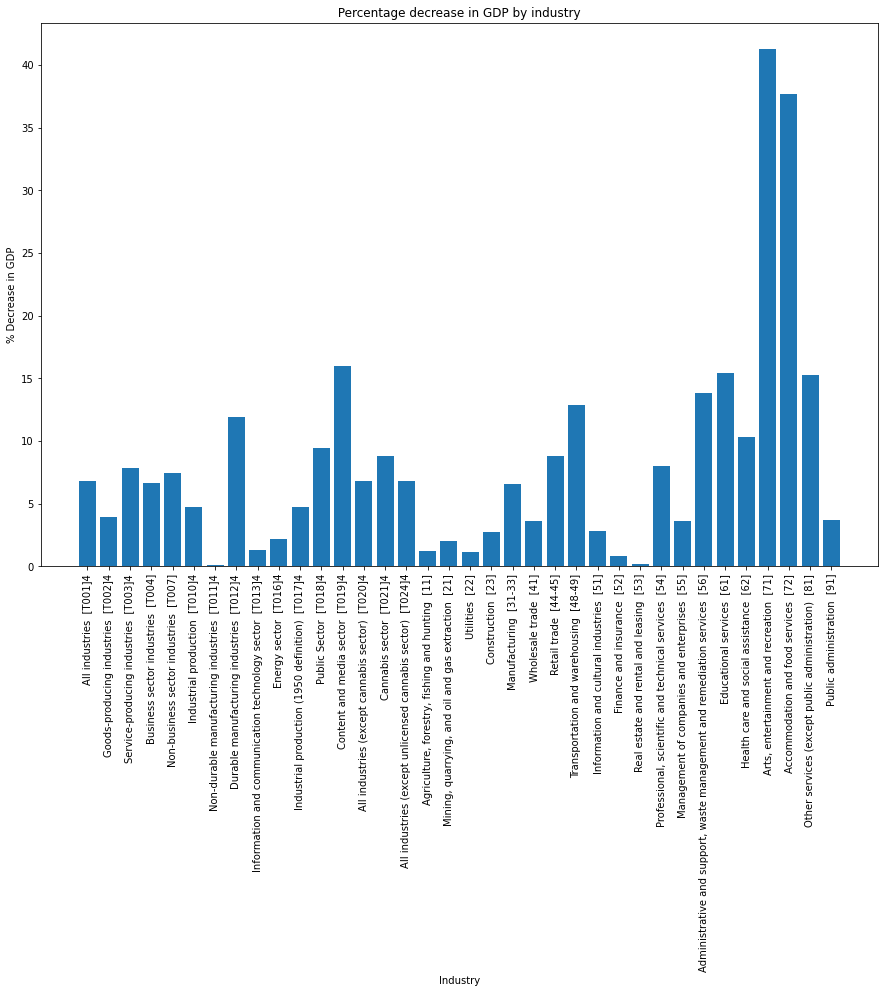

In [47]:
#plotting the decrease in GDP by industry
plt.figure(figsize=(15,10))
plt.bar(x=gdp_t.columns,height=-gdp_t.loc['Increased/Decreased Percentage'])
plt.xticks(rotation=90)
plt.xlabel('Industry')
plt.ylabel('% Decrease in GDP')
plt.title(' Percentage decrease in GDP by industry ')
plt.show()

Thus from the above plot we can observe that the decrease in GDP was highest for the 'Arts, entertainment and recreation' industry (decreased by more than 41.28%), followed by the 'Accomodation and food services' industry (decreased by more than 37.67%), these are the hardest hit industries in terms of GDP. The GDP for the 'Real estate and rental and leasing' (decreased by 0.2%) and the 'Non-durable manfucaturing'(decreased by 0.083%) industries did not decrease much over the months from Nov-2019 to Mar-2020.

*GDP trends of industries over the period of Nov-2019 to Mar-2020:*

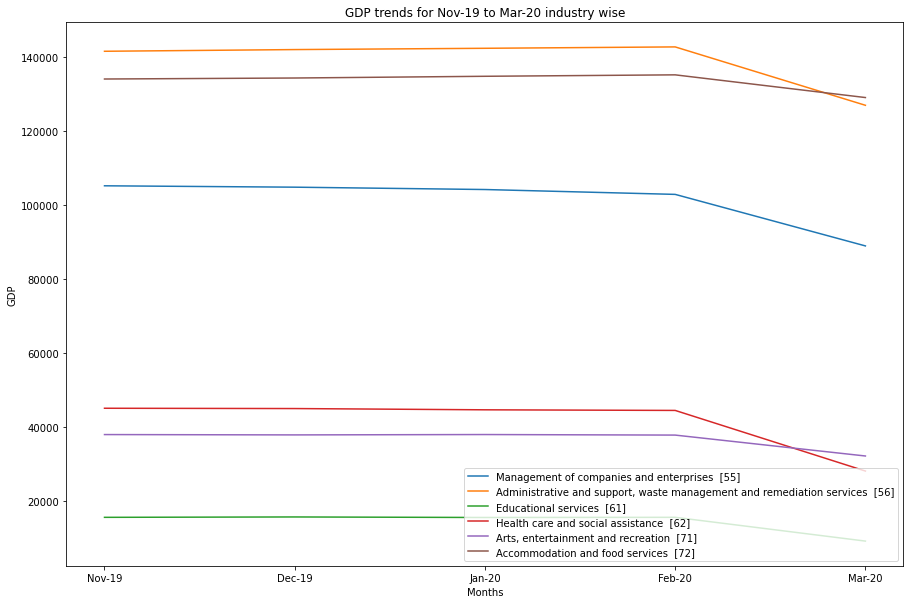

In [48]:
#plotting some of the industry and their GDP trend
plt.figure(figsize=(15,10))
plt.plot(gdp_t.iloc[:-1,30:])
plt.xlabel('Months')
plt.ylabel('GDP')
plt.title('GDP trends for Nov-19 to Mar-20 industry wise')
plt.legend(gdp_t.iloc[:-1,28:].columns,loc='lower right')
plt.show()

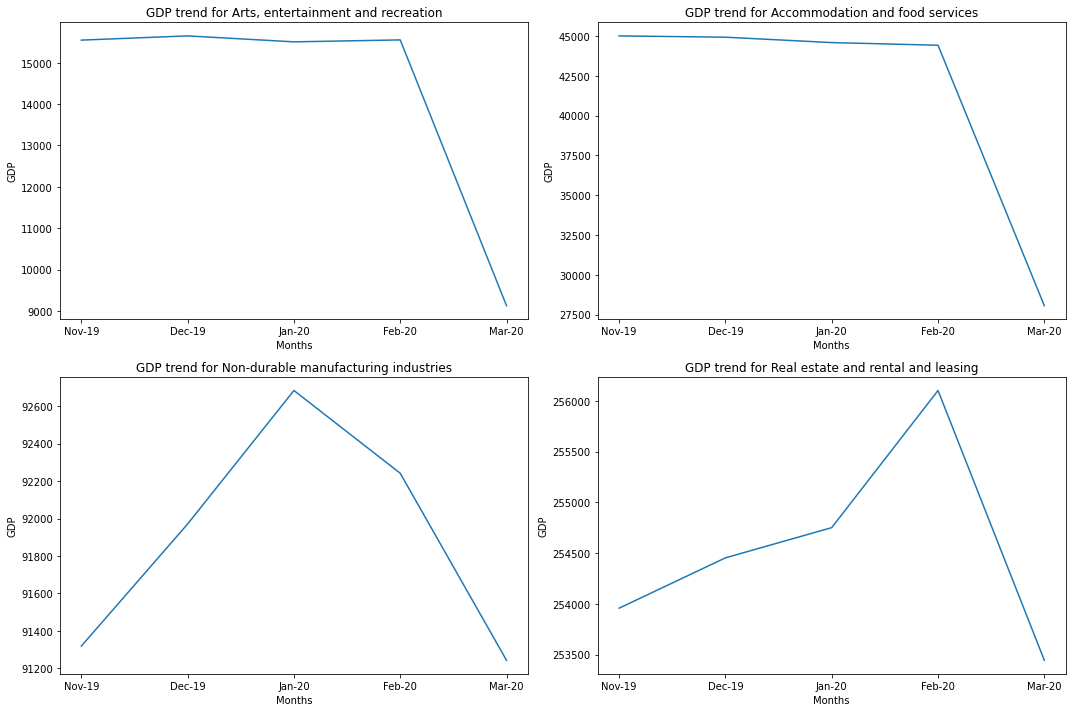

In [49]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.plot(gdp_t['Arts, entertainment and recreation  [71]'].loc[['Nov-19','Dec-19','Jan-20','Feb-20','Mar-20']])
plt.title('GDP trend for Arts, entertainment and recreation')
plt.xlabel('Months')
plt.ylabel('GDP')

plt.subplot(2,2,2)
plt.plot(gdp_t['Accommodation and food services  [72]'].loc[['Nov-19','Dec-19','Jan-20','Feb-20','Mar-20']])
plt.title('GDP trend for Accommodation and food services')
plt.xlabel('Months')
plt.ylabel('GDP')

plt.subplot(2,2,3)
plt.plot(gdp_t['Non-durable manufacturing industries  [T011]4'].loc[['Nov-19','Dec-19','Jan-20','Feb-20','Mar-20']])
plt.title('GDP trend for Non-durable manufacturing industries')
plt.xlabel('Months')
plt.ylabel('GDP')

plt.subplot(2,2,4)
plt.plot(gdp_t['Real estate and rental and leasing  [53]'].loc[['Nov-19','Dec-19','Jan-20','Feb-20','Mar-20']])
plt.title('GDP trend for Real estate and rental and leasing')
plt.xlabel('Months')
plt.ylabel('GDP')

plt.tight_layout()
plt.show()

* Thus as we saw before and can also be noted from the above plots that the GDP for industries like 'Arts, entertainment and recreation', Accommodation and food services' have significantly decreased over these months.
* And industries like 'Non-durable manufacturing' and 'Real estate and rental and leasing' which were initially experiencing a steep increase in GDP and would have probably further increased but due to the COVID-19 situation faced a declining rate over the time.

*Visualizing the monthly CPI product/product group wise:*

Now lets visualize the CPI of the product/product groups for the month of Dec-2019 and Apr-2020 to see how the CPI of the products changed over these months.

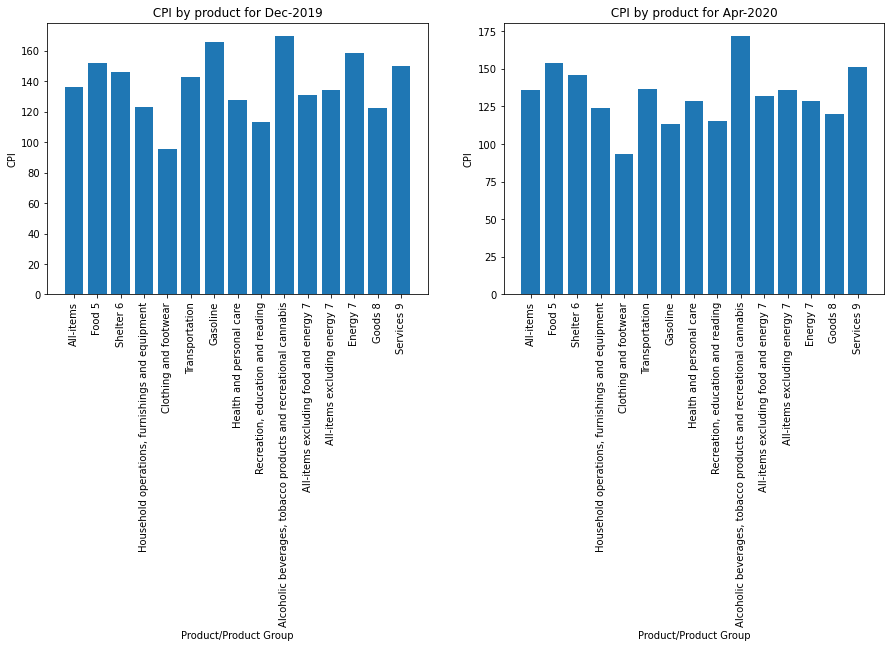

In [50]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.bar(cpi_t.columns,height=cpi_t.loc['Dec-19'])
plt.xticks(rotation=90)
plt.xlabel('Product/Product Group')
plt.ylabel('CPI')
plt.title(' CPI by product for Dec-2019 ')


plt.subplot(1,2,2)
plt.bar(cpi_t.columns,height=cpi_t.loc['Apr-20'])
plt.xticks(rotation=90)
plt.xlabel('Product/Product Group')
plt.ylabel('CPI')
plt.title(' CPI by product for Apr-2020 ')
plt.show()

So as we can observe that the CPI for certain products have like 'Gasoline' and 'Energy' have significantly decreased which is probably due to the lock-down imposed during these months. To better analyze the change in CPI product wise, let's visualize the percentage change in CPI over these months:

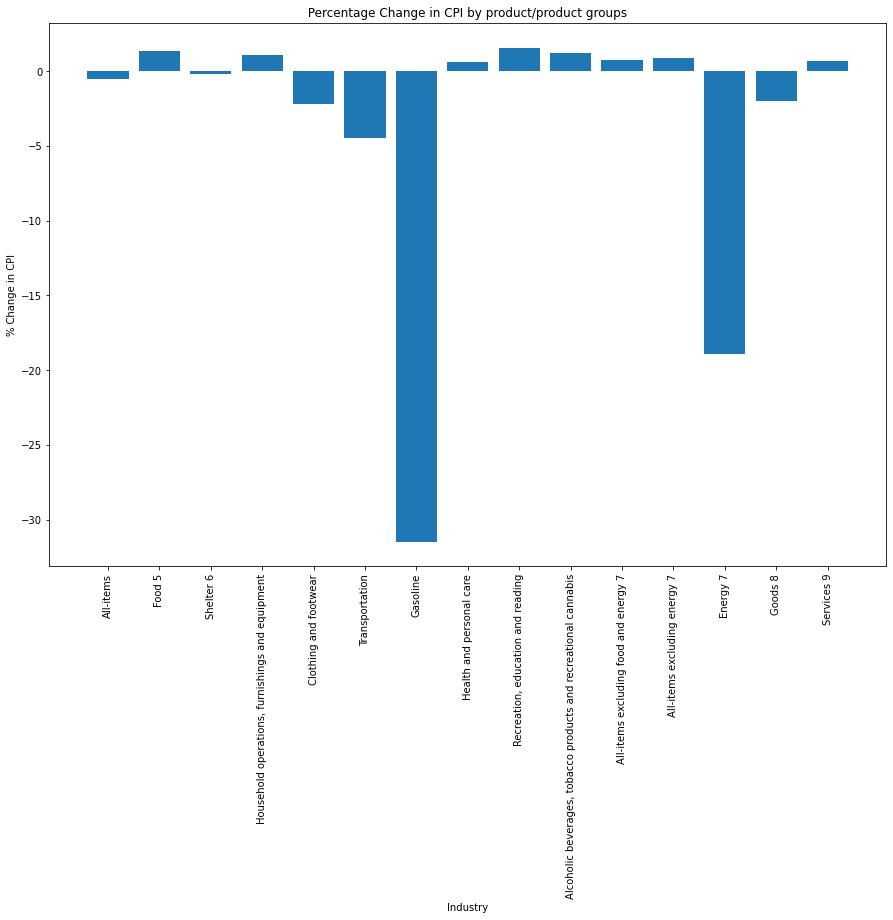

In [51]:
#plotting the change in CPY by product/product group
plt.figure(figsize=(15,10))
plt.bar(x=cpi_t.columns,height=cpi_t.loc['Increased/Decreased Percentage'])
plt.xticks(rotation=90)
plt.xlabel('Industry')
plt.ylabel('% Change in CPI')
plt.title(' Percentage Change in CPI by product/product groups ')
plt.show()

* Thus from the above plot we can observe that the CPI decreased for some products and there was a significant decrease in CPI for 'Gasoline'(decreased by more than 31.48% ) and 'Energy'(decreased by more than 18.95% ). 
* Whereas the CPI increased for most of the products like 'Food'(inncreased by 1.38%) and 'Recreation, education and reading' (increased by 1.59%).

*CPI trends of products over the months of Dec-2019 to Apr-2020:*

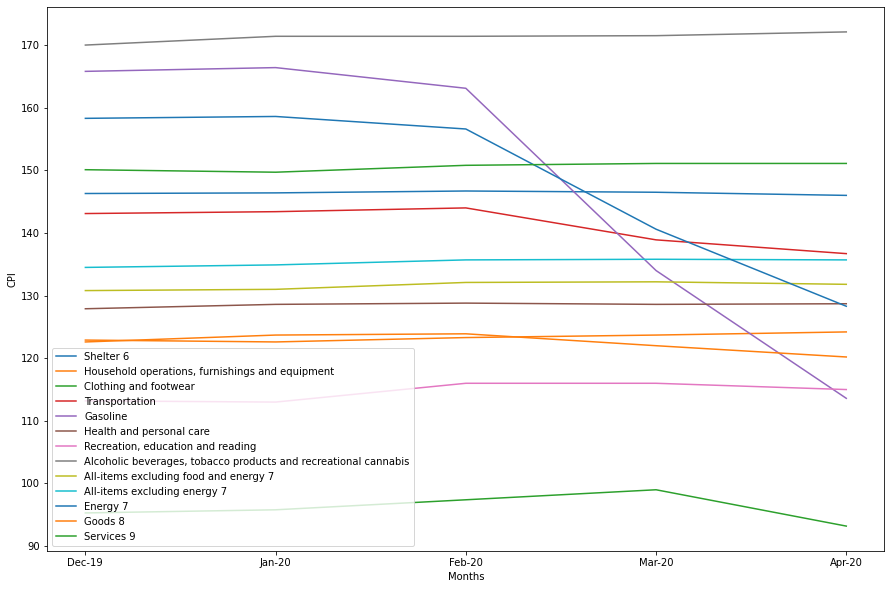

In [52]:
plt.figure(figsize=(15,10))
plt.plot(cpi_t.iloc[:-1,2:])
plt.xlabel('Months')
plt.ylabel('CPI')
plt.legend(cpi_t.iloc[:,2:].columns,loc='lower left')
plt.show()

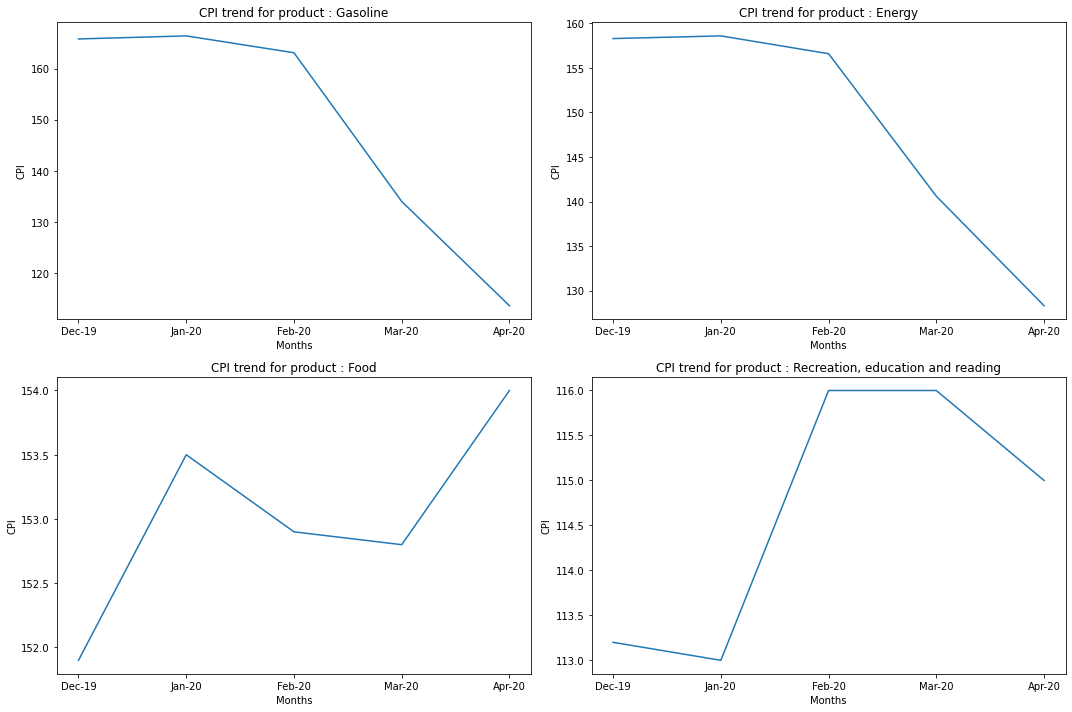

In [53]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.plot(cpi_t['Gasoline'].loc[['Dec-19','Jan-20','Feb-20','Mar-20','Apr-20']])
plt.xlabel('Months')
plt.ylabel('CPI')
plt.title('CPI trend for product : Gasoline')

plt.subplot(2,2,2)
plt.plot(cpi_t['Energy 7'].loc[['Dec-19','Jan-20','Feb-20','Mar-20','Apr-20']])
plt.xlabel('Months')
plt.ylabel('CPI')
plt.title('CPI trend for product : Energy')

plt.subplot(2,2,3)
plt.plot(cpi_t['Food 5'].loc[['Dec-19','Jan-20','Feb-20','Mar-20','Apr-20']])
plt.xlabel('Months')
plt.ylabel('CPI')
plt.title('CPI trend for product : Food')

plt.subplot(2,2,4)
plt.plot(cpi_t['Recreation, education and reading'].loc[['Dec-19','Jan-20','Feb-20','Mar-20','Apr-20']])
plt.xlabel('Months')
plt.ylabel('CPI')
plt.title('CPI trend for product : Recreation, education and reading')

plt.tight_layout()

* Thus as we saw before and can also note from the above plots that the CPI for products like 'Gasoline', 'Energy' have significantly decreased over these months.
* And products like 'Food' and 'Recreation, education and reading' has experienced an increase over the time. Though the CPI for 'Recreation, education and reading' seems to be decreasing now but the CPI for 'Food' is still increasing steeply

*Visualizing the working hours by industries:*

Lets now visualize the working hours industry wise for the month of Jan-2020 and May-2020 to see how the working hours of the industries changed over these months:

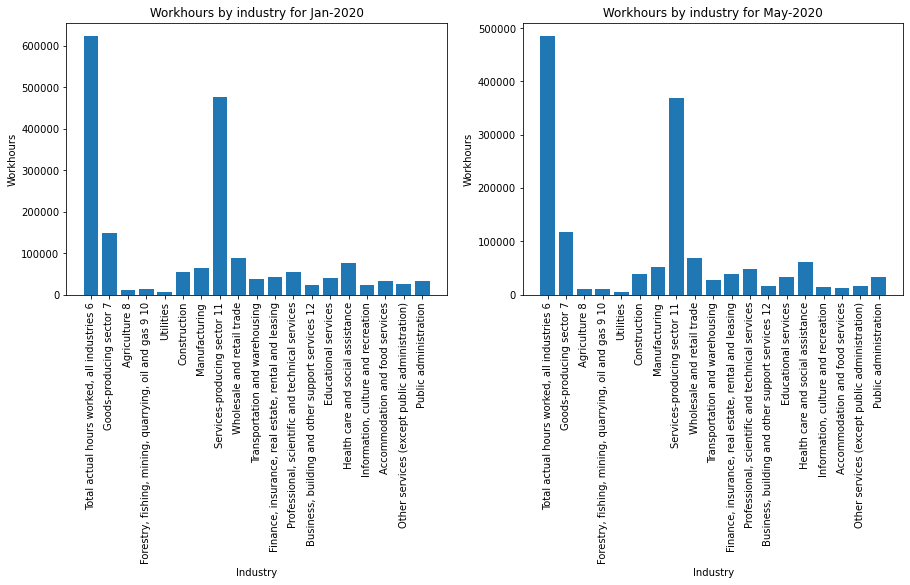

<Figure size 432x288 with 0 Axes>

In [54]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.bar(workhours_t.columns,height=workhours_t.loc['Jan-20'])
plt.xticks(rotation=90)
plt.xlabel('Industry')
plt.ylabel('Workhours')
plt.title(' Workhours by industry for Jan-2020 ')


plt.subplot(1,2,2)
plt.bar(workhours_t.columns,height=workhours_t.loc['May-20'])
plt.xticks(rotation=90)
plt.xlabel('Industry')
plt.ylabel('Workhours')
plt.title(' Workhours by industry for May-2020 ')
plt.show()
plt.tight_layout()

So as we can observe that the workhours for all the listed industries have decreased. To better analyze the decreas in the workhours industry wise, let's visualize the percentage decrease in workhours over these months:

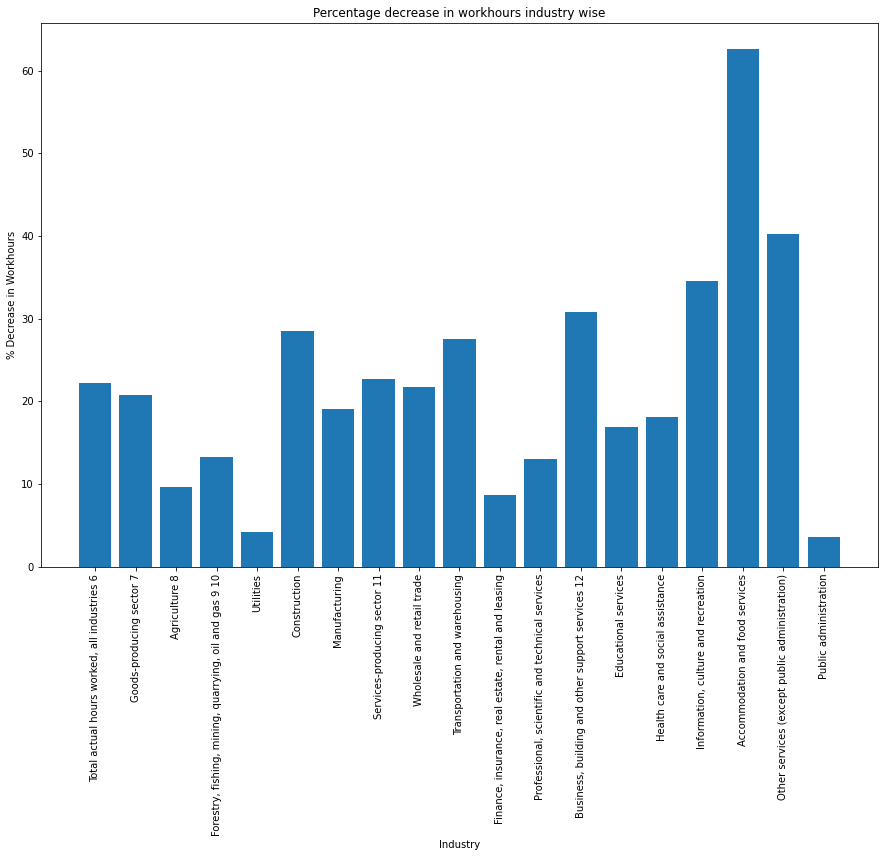

In [55]:
plt.figure(figsize=(15,10))
plt.bar(x=workhours_t.columns,height=-workhours_t.loc['Increased/Decreased Percentage'])
plt.xticks(rotation=90)
plt.xlabel('Industry')
plt.ylabel('% Decrease in Workhours')
plt.title('Percentage decrease in workhours industry wise')
plt.show()

* Thus from the above plot we can observe that the decrease in workhours was highest for the 'Accomodation and food services' industry (decreased by more than 62.63%), followed by the 'Other services (except public administration)' industry (decreased by more than 40.17%), these are the hardest hit industries in terms of workhours. 
* The workhours for the 'Public Administration' (decreased by 3.62%) and the 'Utilities'(decreased by 4.22%) industries did not decrease much over the months from Jan-2020 to May-2020.

*Workhours trend industry wise over the period of Jan-May 2020:*

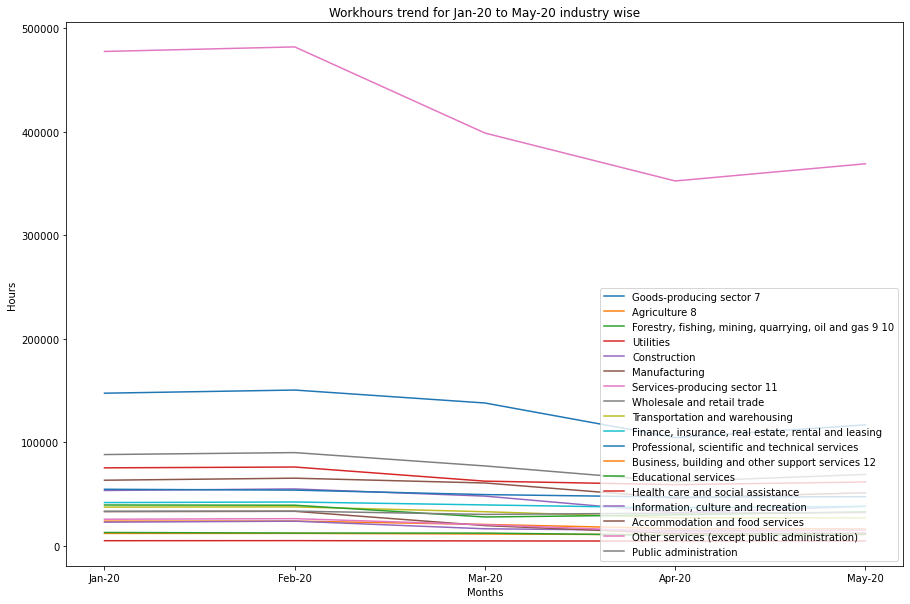

In [56]:
plt.figure(figsize=(15,10))
plt.plot(workhours_t.iloc[:-1,1:19])
plt.xlabel('Months')
plt.ylabel('Hours')
plt.title('Workhours trend for Jan-20 to May-20 industry wise')
plt.legend(workhours_t.iloc[:,1:].columns,loc='lower right')
plt.show()

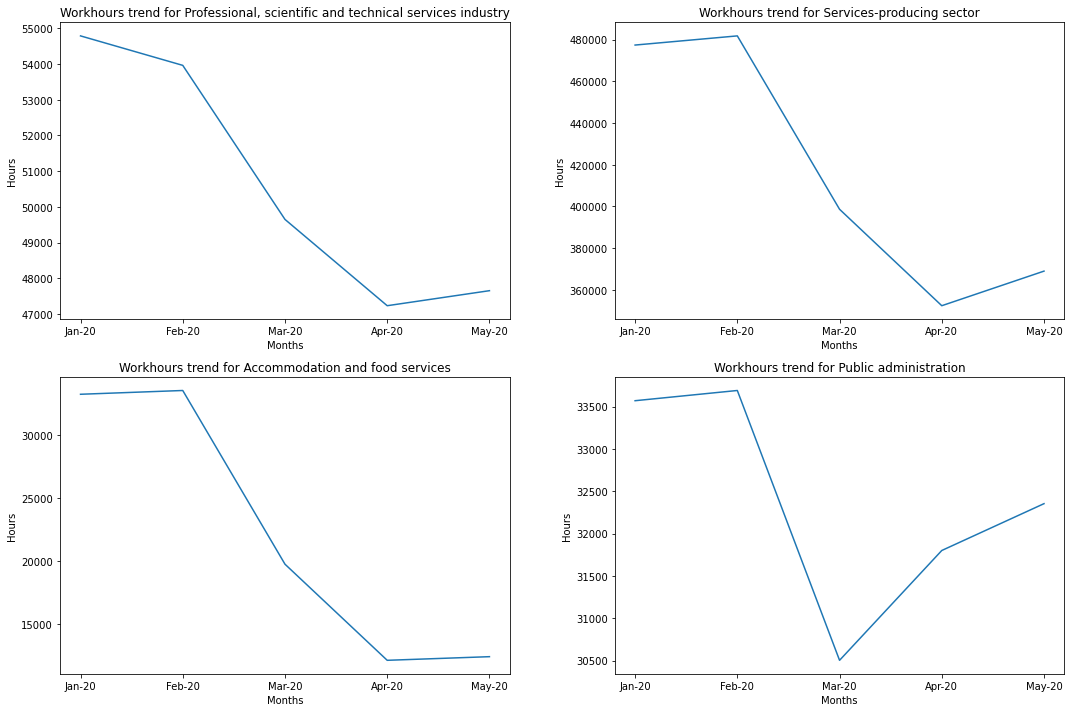

In [57]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.plot(workhours_t['Professional, scientific and technical services'].loc[['Jan-20','Feb-20','Mar-20','Apr-20','May-20']])
plt.xlabel('Months')
plt.ylabel('Hours')
plt.title('Workhours trend for Professional, scientific and technical services industry')

plt.subplot(2,2,2)
plt.plot(workhours_t['Services-producing sector 11'].loc[['Jan-20','Feb-20','Mar-20','Apr-20','May-20']])
plt.xlabel('Months')
plt.ylabel('Hours')
plt.title('Workhours trend for Services-producing sector')

plt.subplot(2,2,3)
plt.plot(workhours_t['Accommodation and food services'].loc[['Jan-20','Feb-20','Mar-20','Apr-20','May-20']])
plt.xlabel('Months')
plt.ylabel('Hours')
plt.title('Workhours trend for Accommodation and food services')

plt.subplot(2,2,4)
plt.plot(workhours_t['Public administration'].loc[['Jan-20','Feb-20','Mar-20','Apr-20','May-20']])
plt.xlabel('Months')
plt.ylabel('Hours')
plt.title('Workhours trend for Public administration')

plt.tight_layout()

* Thus as we saw before and can also note from the above plots that the workhours for industries like 'Accomodation and food services' have significantly decreased over these months.
* And products like 'Public administration' and 'Servicing producing sector' has experienced a steep decrease in workhours during the initial phase of this period but now they are slowly increasing over the time and this change can be contributed to the slow reopening of the economy. 